## Weight prediction - Machine Learning Project

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Data Science

In [2]:
# Getting data from csv file

df = pd.read_csv("weight-height.csv")
df.shape

(10000, 3)

In [3]:
# Changing gender to binary
# Male = 0, Female = 1

df["Gender"] = df["Gender"].map({"Male":0, "Female":1})

In [4]:
# Coverting data to metric

df["Height"] = df["Height"]*2.54
df["Weight"] = df["Weight"]/2.205

In [5]:
df.head()

,Gender,Height,Weight
0,0,187.571423,109.702296
1,0,174.706036,73.610192
2,0,188.239668,96.481114
3,0,182.196685,99.792504
4,0,177.499761,93.582676


In [6]:
# General info of df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  int64  
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [7]:
# Describing the df

df.describe()

,Gender,Height,Weight
count,10000.000000,10000.000000,10000.000000
mean,0.500000,168.573602,73.215581
std,0.500025,9.772721,14.561650
min,0.000000,137.828359,29.342461
25%,0.000000,161.304276,61.595488
50%,0.500000,168.447898,73.112439
75%,1.000000,175.702625,84.884138
max,1.000000,200.656806,122.444308


In [8]:
# Checking for NaN values in da data frame

df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [9]:
# Looking for correlations in the df

df.corr()

,Gender,Height,Weight
Gender,1.000000,-0.691072,-0.796723
Height,-0.691072,1.000000,0.924756
Weight,-0.796723,0.924756,1.000000


In the output above we can  
see that Height and Weight   
explains about 92% of   
each other.  
  
Gender has a negative correlation  
with the Weight and Height wich means  
that if your Gender is 1 your Height   
and Weight tends to be lower. And  
on the ohter hand, if your gender is 0  
your Height and Weight tends to be  
higher.  

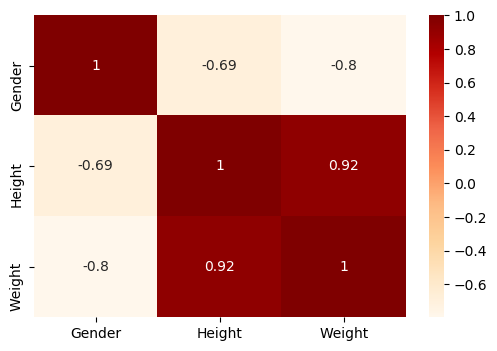

In [10]:
# Heatmap of the data frame for better visualization of the correlation

plt.subplots(dpi=100)
sns.heatmap(df.corr(), annot=True, cmap="OrRd")

In [11]:
# Extracting unique data from df

maleHeight = df.loc[df["Gender"]==0]["Height"]
maleWeight = df.loc[df["Gender"]==0]["Weight"]

femaleHeight = df.loc[df["Gender"]==1]["Height"]
femaleWeight = df.loc[df["Gender"]==1]["Weight"]

Text(0, 0.5, '')

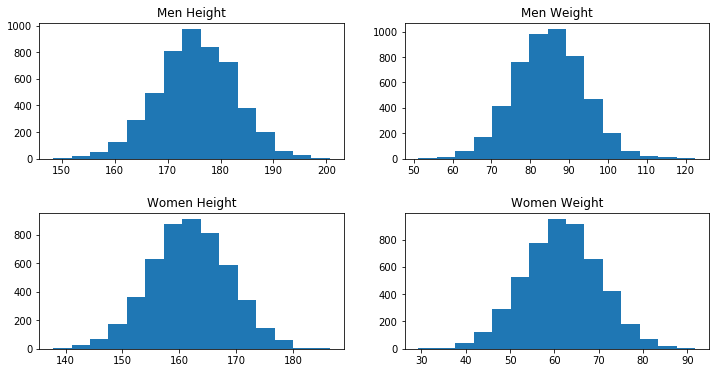

In [12]:
# Plotting height and weight histograms for men and women 

f, ax = plt.subplots(2,2,figsize=(12,6))
plt.subplots_adjust(hspace = 0.4)

maleHeight.plot.hist(bins=15,ax=ax[0][0])
ax[0][0].set_title("Men Height")
ax[0][0].set_ylabel('')

maleWeight.plot.hist(bins=15,ax=ax[0][1])
ax[0][1].set_title("Men Weight")
ax[0][1].set_ylabel('')

femaleHeight.plot.hist(bins=15,ax=ax[1][0])
ax[1][0].set_title("Women Height")
ax[1][0].set_ylabel('')

femaleWeight.plot.hist(bins=15,ax=ax[1][1])
ax[1][1].set_title("Women Weight")
ax[1][1].set_ylabel('')

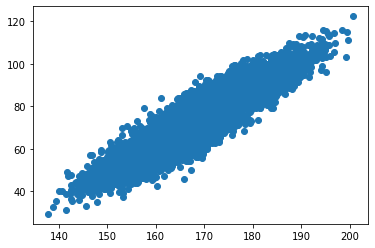

In [13]:
# Scatter plot of our data

plt.scatter(df["Height"], df["Weight"])

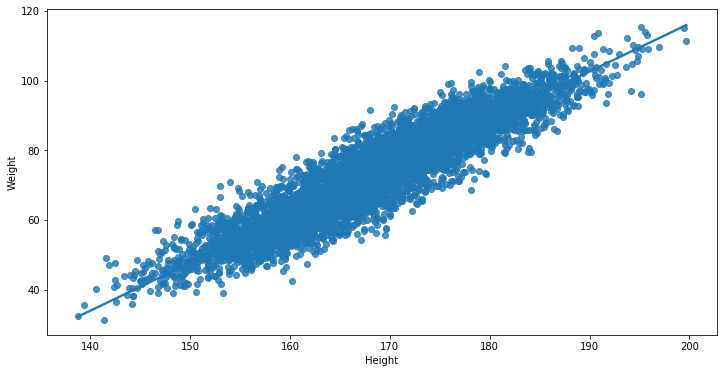

In [14]:
Linea

plt.subplots(1,1,figsize=(12,6))
sns.regplot(df["Height"][2500:7500], df["Weight"][2500:7500], ci=95)

## Machine Learning 

For this model, we are predicting Weight.

In [15]:
# Getting X and y

X = df.drop("Weight", axis=1)
y = df["Weight"]

In [16]:
# Importing the libraries used to train and evaluate the machine learning model

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
# Initializing the Linear Regression model

lm = linear_model.LinearRegression()

In [18]:
# Splitting our data into train data and test data with sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [19]:
# Make sure that X and y have the same lenght

X_train.shape, y_train.shape

((7000, 2), (7000,))

In [20]:
# Training the model

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Model prediction

pred = lm.predict(X_test)

In [22]:
# The score measures how well our model did on the test data

lm.score(X_test,y_test)

0.9066151030846358

In [23]:
# Calculating Root Mean Square Error of our model
# Getting Mean Square Error 

mse = mean_squared_error(y_test, pred)

In [24]:
# RMSE is a value used to measure the differencess between the model prediction and the actual values
rmse = np.sqrt(mse)
rmse

4.521824097694998

This means that our model, on average, has a  +4.52 or -4.52 predicion error

In [25]:
# Inserting your own data for fun

data = {
    "Gender":0,
    "Height":160
}

df = pd.DataFrame(data, index=[0])

In [26]:
# Prediction 

lm.predict(df)

array([68.447718])